In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("talk", rc={"lines.linewidth": 1})
sns.set_style("ticks")

%config InlineBackend.figure_format = 'retina'


In [130]:
def plot_data(x_1, x_2, vectors, title):
    fig, ax = plt.subplots(figsize=(8,8))
    
    plt.scatter(x_1, x_2, alpha=0.5)
    
    colors = ['r', 'g', 'b', 'b', 'b']
    for idx, v in enumerate(vectors):
        ax.quiver([0], [0], [v[0]], [v[1]], angles='xy', scale_units='xy', scale=1, color=[colors[idx]])
    
    """Create legend & labels"""
    ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
    ax.set_xlabel('$X_1$', fontsize=20)
    ax.set_ylabel('$X_2$', fontsize=20)
    plt.axis('equal')
    plt.title(title)
    plt.show()
    

In [131]:
def run_experiment(x_1, x_2):
    # Center data
    centered_x_1 = x_1 - x_1.mean()
    centered_x_2 = x_2 - x_2.mean()
    
    # Plot data
    i_hat = np.array([[1], [0]])
    j_hat = np.array([[0], [1]])
    random_vec1 = np.array([[np.random.normal() * 3] , [np.random.normal() * 3]])
    random_vec2 = np.array([[np.random.normal() * 3] , [np.random.normal() * 3]])
    random_vec3 = np.array([[np.random.normal() * 3] , [np.random.normal() * 3]])
    vectors = [i_hat, j_hat, random_vec1, random_vec2, random_vec3]
    plot_data(centered_x_1, centered_x_2, vectors, 'Original')

    # Covariance Matrix
    covariance_matrix = np.cov(centered_x_1, centered_x_2, bias=True)
    display('Covariance Matrix: ', covariance_matrix)
    
    # Plot with transformed 
    transformed_vectors = []
    for vec in vectors:
        transformed_vectors.append(covariance_matrix.dot(vec))
    plot_data(centered_x_1, centered_x_2, transformed_vectors, 'Transformed')

In [132]:
num_points = 100
x_1 = np.linspace(0, 6, num_points)
noise = np.random.normal(0,1,num_points)
x_2 = 2*x_1 + noise

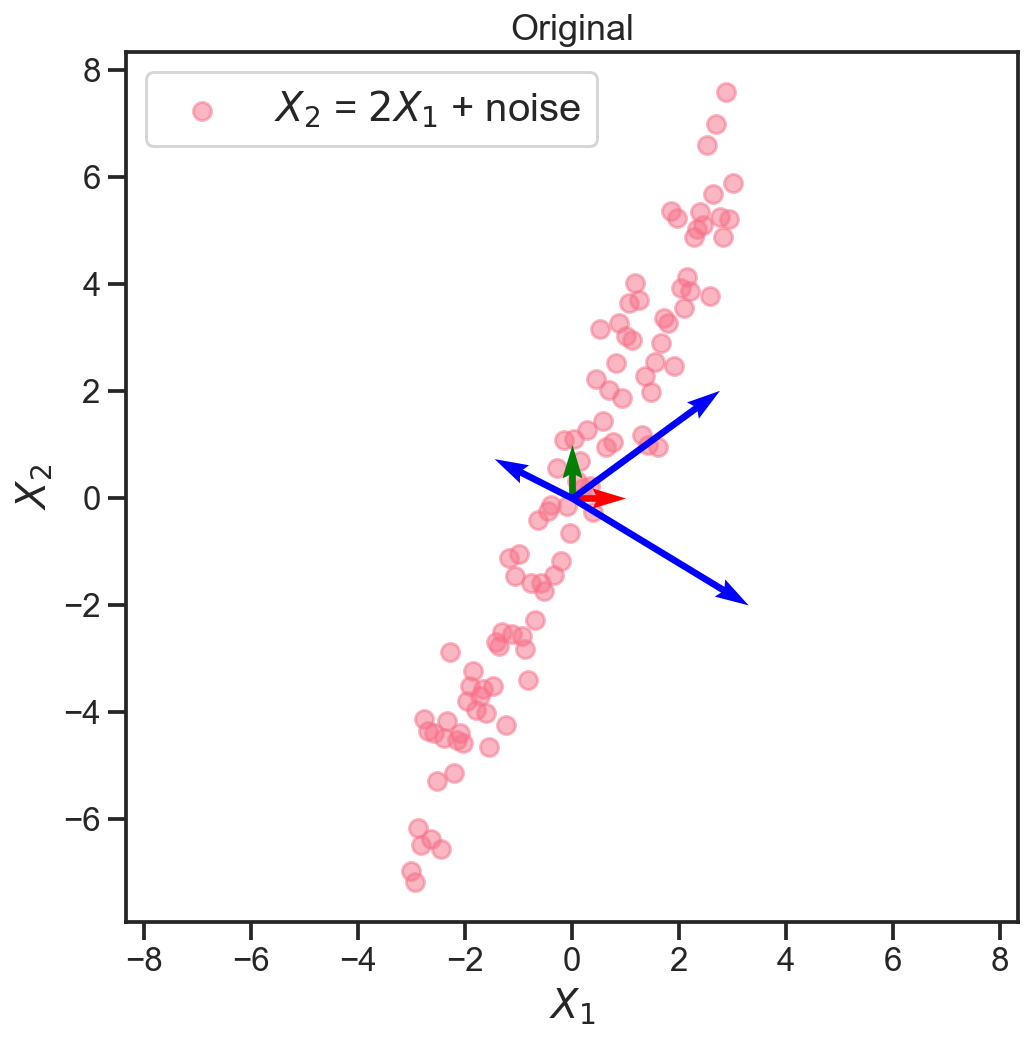

'Covariance Matrix: '

array([[ 3.06060606,  6.32470702],
       [ 6.32470702, 13.96035181]])

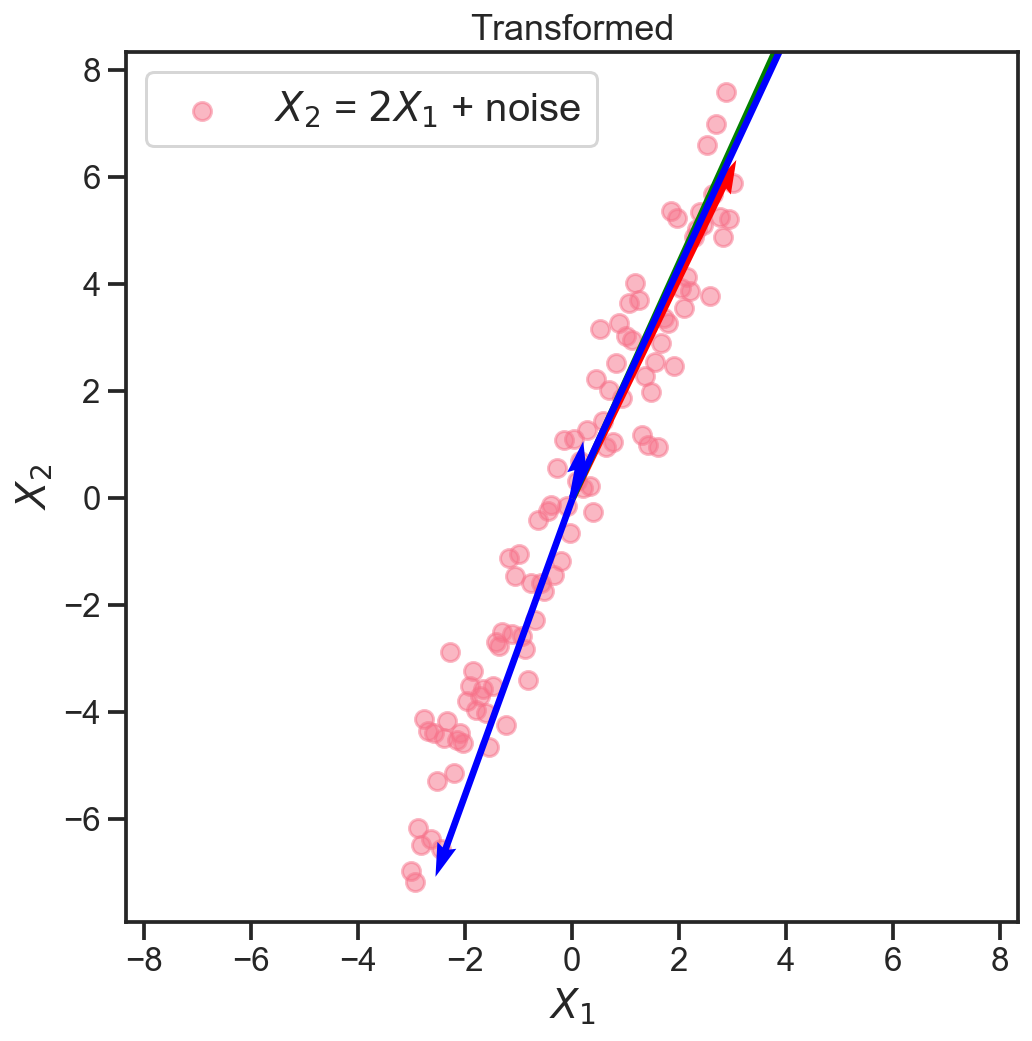

In [133]:
run_experiment(x_1, x_2)

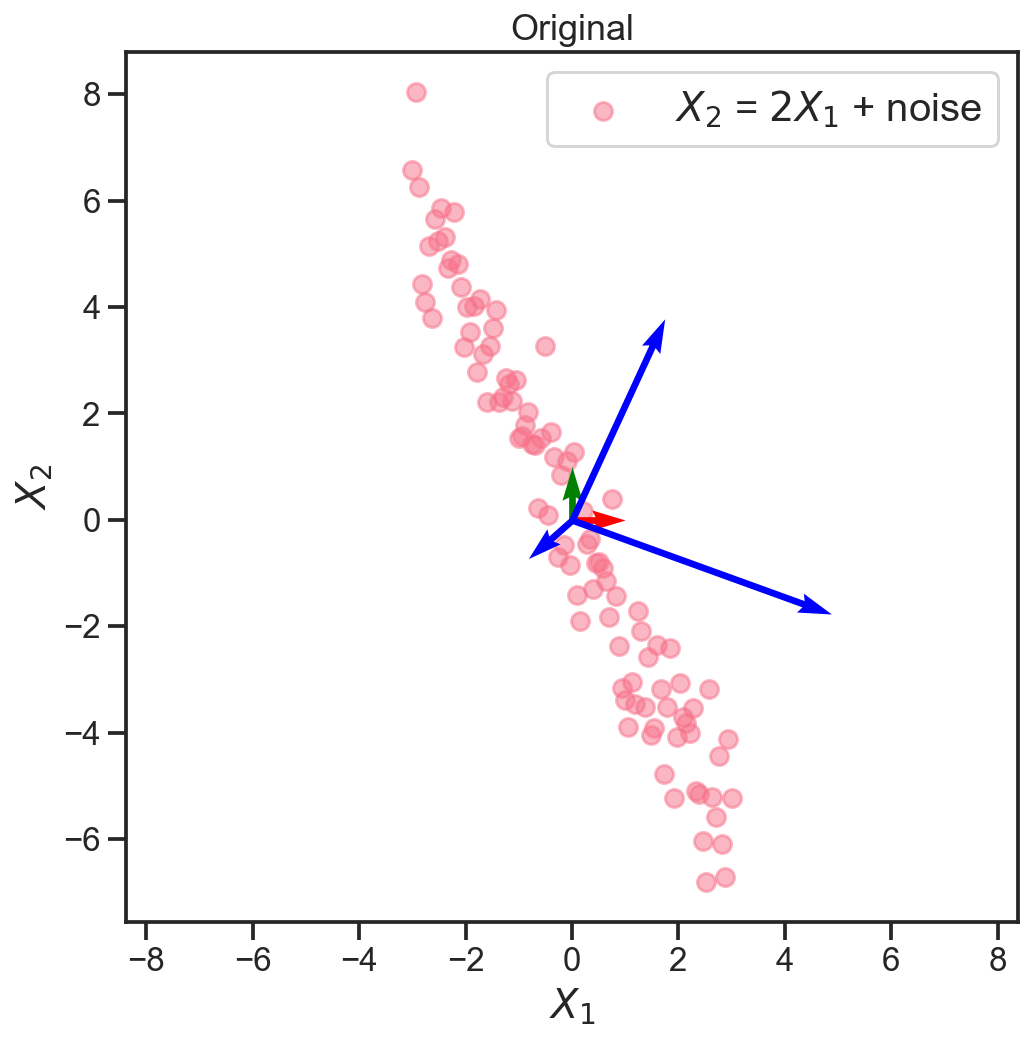

'Covariance Matrix: '

array([[ 3.06060606, -6.19267078],
       [-6.19267078, 13.31594198]])

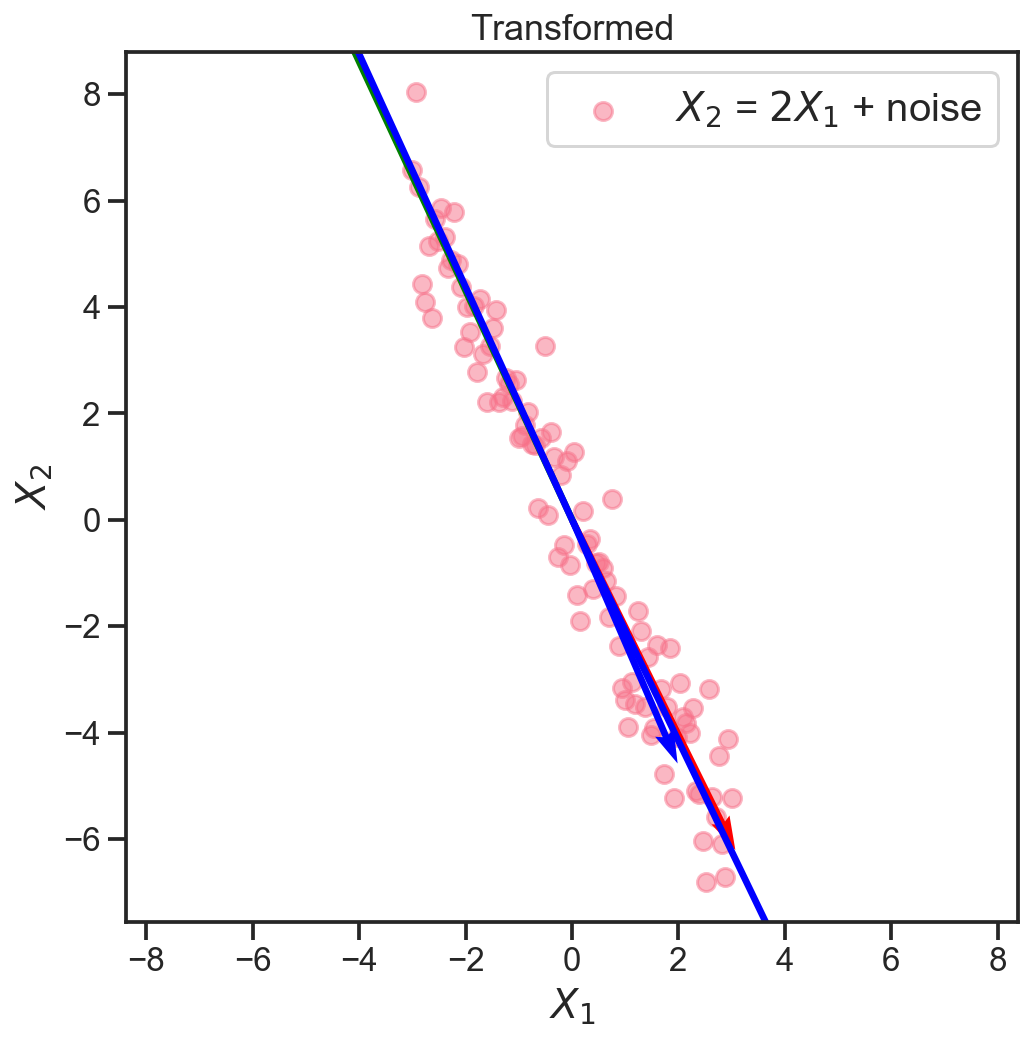

In [134]:
num_points = 100
x_1 = np.linspace(0, 6, num_points)
noise = np.random.normal(0,1,num_points)
x_2 = -2*x_1 + noise

run_experiment(x_1, x_2)

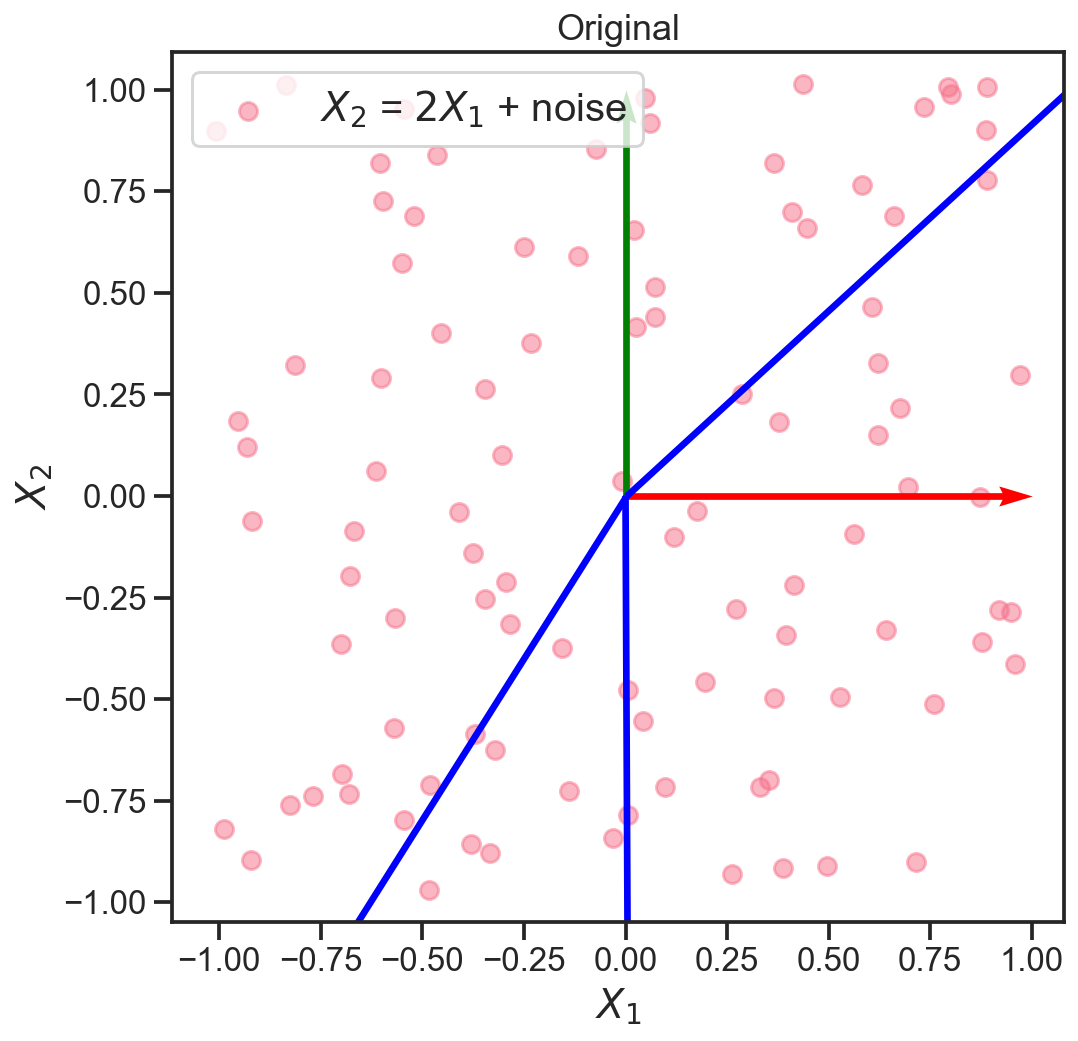

'Covariance Matrix: '

array([[0.32634725, 0.05124235],
       [0.05124235, 0.37931425]])

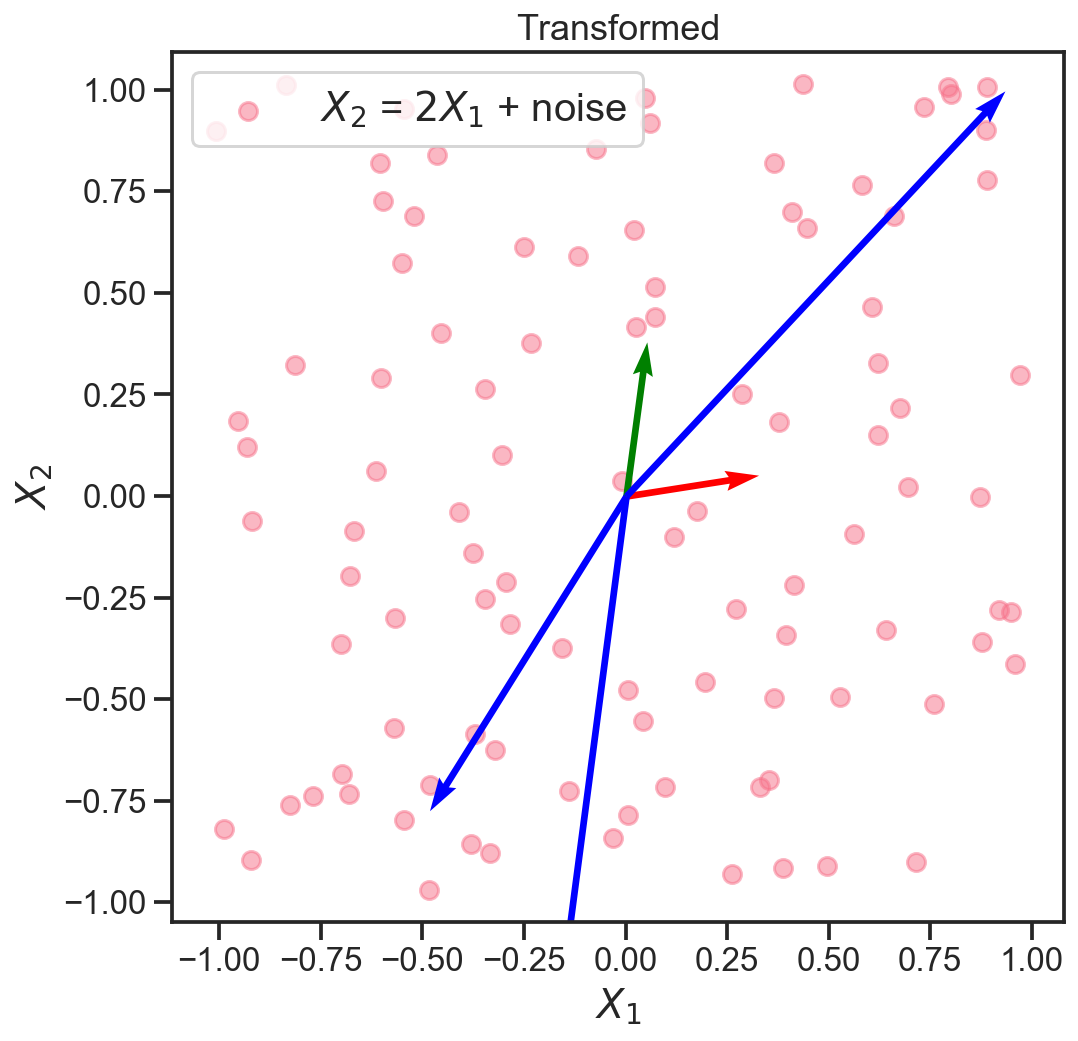

In [137]:
num_points = 100
x_1 = np.random.random(num_points)*2
# noise = np.random.normal(0,1,num_points)
x_2 = np.random.random(num_points)*2

run_experiment(x_1, x_2)

# Key Idea
The key thing to keep in mind here is that we can view the covariance matrix as a linear transformation of our original dataset, $X$. Recall, this linear transformation will move our basis vectors $\hat{i}$ and $\hat{j}$ to the locations of the column vectors. For instance, if our covariance matrix is:

$$
Cov = 
\begin{bmatrix}
3 \;\;\; 6 \\
6 \;\;\; 12
\end{bmatrix}
$$

And as we know our basis vectors start out as:

$$
\text{Basis} = 
\begin{bmatrix}
1 \;\;\; 0 \\
0 \;\;\; 1
\end{bmatrix}
$$

Then our transformed basis vectors will be:

$$\hat{i} = 
\begin{bmatrix}
3 \\
6 
\end{bmatrix}
$$

$$\hat{j} = 
\begin{bmatrix}
6 \\
12 
\end{bmatrix}
$$

If we think for a moment about just transforming those two basis vectors, mechanically we can see that there are two forces at play:
1. The **variance** of $x_1$ and $x_2$. This variance will transform the basis vector's in their respective directions, i.e. it will scale them. For instance, consider the transformation of $\hat{i}$ above. If $\hat{i}$ is moved to $\hat{i} = \begin{bmatrix}3 \\ 6 \end{bmatrix}$, we see that the original value in the $\hat{i}$ ($x_1$) direction, $1$, is now moved to $3$, the _variance_ of $x_1$. So in other words, $1$ was scaled to $3$-it is a function of the variance. 

2. The **covariance** of $x_1$ with $x_2$ (in the above matrix the covariance is $6$), that will cause the basis vectors ($\hat{i}$ and $\hat{j}$) to be rotated inward towards each other. For instance, in the case of $\hat{i}$ we already saw that it's $x_1$ component was moved to $3$. Based on the covariance between $x_1$ and $x_2$ it's $x_2$ component is going to be moved to $6$. So, the initial basis vectors will both be transformed via a rotation and moved inwards towards eachother. 

Hence, a transformation via the covariance matrix will rotate our basis vectors towards each other in the case that they are correlated. What if they are not correlated? For instance:

$$
Cov = 
\begin{bmatrix}
3 \;\;\; 0 \\
0 \;\;\; 12
\end{bmatrix}
$$

Well, in this case our basis vectors will be moved to: 

$$\hat{i} = 
\begin{bmatrix}
3 \\
0 
\end{bmatrix}
$$

$$\hat{j} = 
\begin{bmatrix}
0 \\
12 
\end{bmatrix}
$$

In other words, the basis vectors do not move towards eachother at all, they are simply scaled (no rotation).